## EE 123 Lab 0 - Basic Python and DTFT <br> <small> January 21st, 2016 </small>

### General iPython Notebook usage instructions

- Click the `Play` button to run and advance a cell. The short-cut for it is `shift-enter`
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white down arrow button
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text
- You can change the texts in the `Markdown` cells by double-clicking them.
- To save your notebook, either select `"File->Save and Checkpoint"` or hit `Command-s` for Mac and `Ctrl-s` for Windows
- To undo in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows
- To undo `Delete Cell`, select `Edit->Undo Delete Cell`
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts

### Basic Python Questions:

To complete this part of the lab, you will need to read and run the python tutorial posted on the class website.

Double-click the answer cell to add your answer. You can also insert a new cell by selecting `"Insert->Insert New Cell Below"` or clicking the white down arrow

__Q0.__ What do you add after a function to get the help window?

__A0.__ Add a question mark

__Q1.__ What do you have to import to make all division a real division?

__A1.__ numpy, but python3 already does real division; doesnt floor like python2. but in python2, you have to use floats for real division

__Q2.__ What are the standard abbreviations for `numpy` and `matplotlib.pyplot` ?

__A2.__ np and plt

__Q3.__ What is the output of the following commands?

    x = np.array([1,2,3,4,5,6])
    y = x[0:4]
    y[0] = 7
    print (x)

__A3.__ [7, 2, 3, 4, 5, 6]

__Q4.__ Write a code that prints `[5 4 3 2 1 0 1 2 3 4]`.

In [1]:
# A4. x = np.array([5,4,3,2,1,0, 1, 2, 3, 4])
#print (x)

__Q5.__ Write a code that prints out an array of every other integer from 0 to 4

In [12]:
 #A5. print (np.r_[0:5:2])

__Q6.__ Generate the same plot as in the following figure inline:
    



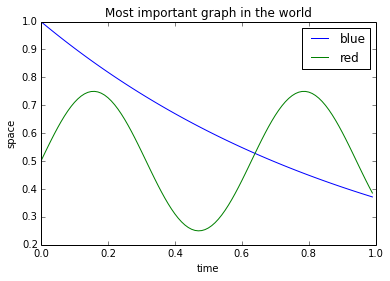

In [3]:
from IPython.display import Image
Image('http://inst.eecs.berkeley.edu/~ee123/sp14/lab/tutorial_plot.jpg')

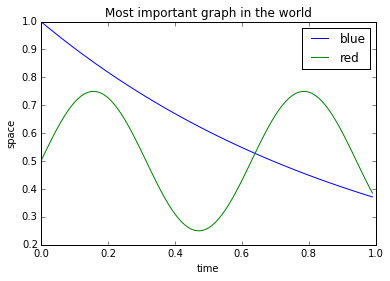

In [14]:
# A6.
x = np.r_[:1:0.01] 
y1 = np.exp( -x )
y2 = np.sin( x*10.0 )/4.0 + 0.5
plt.figure()
plt.plot( x, y1 )
plt.plot( x, y2 )
plt.xlabel( "time" )
plt.ylabel( "space" )

plt.title( "Most important graph in the world" )

plt.legend( ("blue", "red") )

### DTFT:

In this part of the lab, we will look at the DTFT of rectangular windows and triangular windows and compare their performances as low-pass filters. There is a code template provided for each part to help you become familiar with numpy syntax.

### Part (a):

In [4]:
#Import libraries
#import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
print()

Plot the DTFT (at least 512 points) of the rectangular window:

<center>$$ w[n] = \left \{ \begin{array}{cc} 1 & -N \leq n \leq N \\ 0 & \mathrm{otherwise} \end{array} \right. $$ </center>
				
for $ N=5,~20,~100$. Scale the DTFT so that $W(e^{j0})=1$ in your plots. Label your plots! 

Describe the effect of increasing $N$ on the DTFT.

A code template is provided for each part

### Solution for (a):

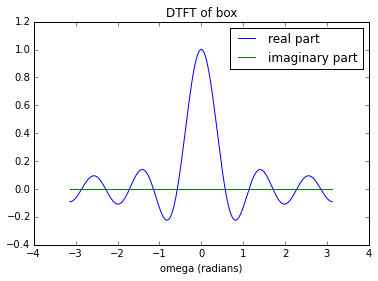

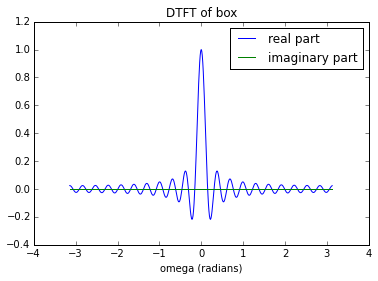

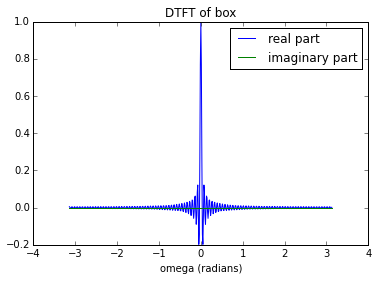

In [133]:
    #repeat for N = 5, 20, 100
    
    num_points = 512
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) using np.ones
        w = np.ones(2*N+1)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.r_[-np.pi: np.pi: np.pi/(num_points/2)]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
       
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
       
        
        
        # evaluate DTFT
        W = DTFT.dot(w)
        
        # normalize W such that W at omega=0 is 1
        W_at_0 = W.real[(int)(np.floor(num_points/2))]
        W = W/W_at_0
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot( Omega, W.real )
        plt.plot( Omega, W.imag )


        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega (radians)" )
        plt.title( "DTFT of box" )
        plt.legend(("real part", "imaginary part"))
        

Describe the effect of increasing $N$ on the DTFT:

makes the response narrower

----

### Part (b):

Repeat part (a) for the triangular window:
$$w_\triangle [n] =  \left ( 1- \frac{|n|}{N} \right ) w[n].$$

### Solution for (b):

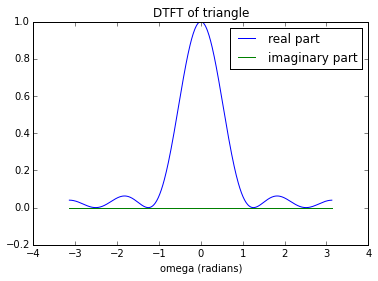

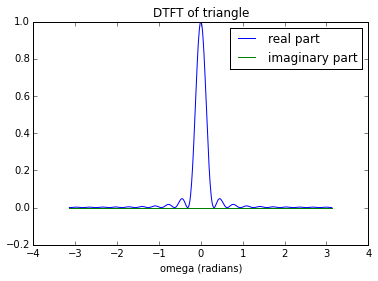

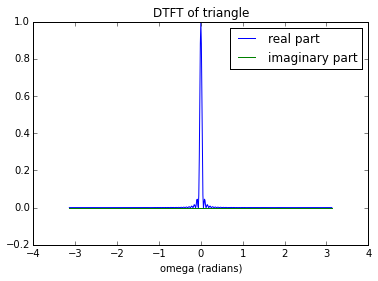

In [185]:
    #repeat for N = 5, 20, 100
    num_points = 512
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) 
        x = np.linspace(0, 1, N+1) 
        y = np.linspace(1-1/N, 0, N)
        window_b = np.concatenate([x,y])
        
        w = (1-abs(NN)/N)
        
        
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.r_[-np.pi: np.pi: np.pi/(num_points/2)]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
       
        
        # evaluate DTFT
        W = DTFT.dot(w)
         
        # normalize W such that W at omega=0 is 1
        W_at_0 = W.real[(int)(np.floor(num_points/2))]
        W = W/W_at_0
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot( Omega, W.real )
        plt.plot( Omega, W.imag )
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega (radians)" )
        plt.title( "DTFT of triangle" )
        plt.legend(("real part", "imaginary part"))
        

Describe the effect of increasing $N$ on the DTFT:
again, makes it narrower

----

### Part (c):

Consider the ideal low-pass filter with cut-off frequency $\omega_c = 0.3 \pi$. Truncate the impulse response of this filter using the windows in parts (a) and (b), and plot the frequency response of the resulting filters. Explain the differences.


### Solution for (c):

/Users/celineveys/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


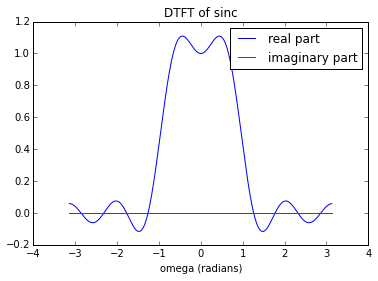

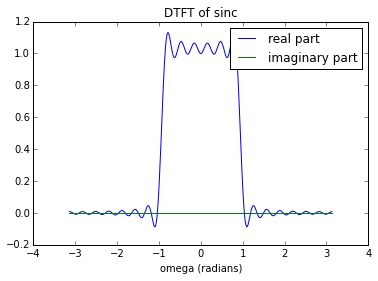

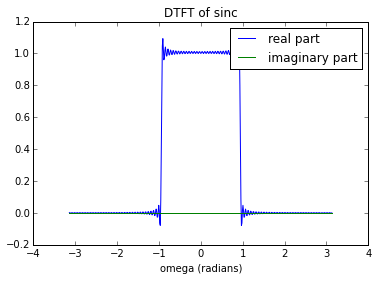

In [179]:
    #repeat for N = 5, 20, 100
    num_points = 512
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) 
        h = np.sin(0.3*np.pi*NN)/(np.pi*NN)
        h[N]=0.3
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.r_[-np.pi: np.pi: np.pi/(num_points/2)]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
       
        
        # evaluate DTFT
        W = DTFT.dot(h)
         
        # normalize W such that W at omega=0 is 1
        W_at_0 = W.real[(int)(np.floor(num_points/2))]
        W = W/W_at_0
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot( Omega, W.real )
        plt.plot( Omega, W.imag )
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega (radians)" )
        plt.title( "DTFT of sinc" )
        plt.legend(("real part", "imaginary part"))
        

/Users/celineveys/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


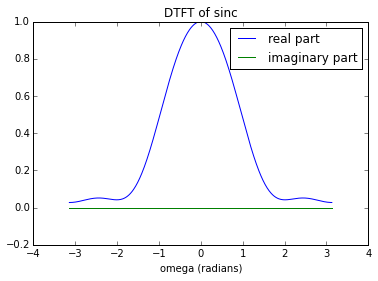

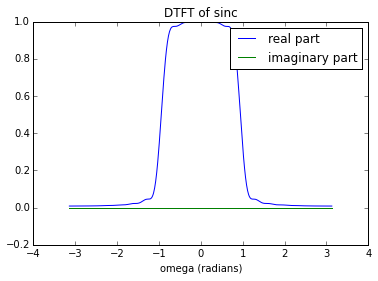

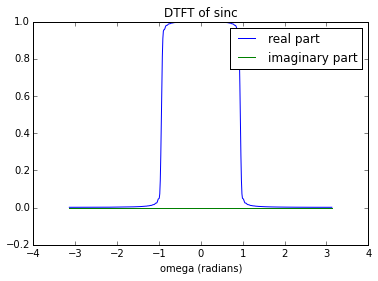

In [182]:
    #repeat for N = 5, 20, 100
    for N in [5, 20, 100]:  
    
        # create 2N+1-point temporal indices (NN) from -N to N using np.r_
        NN = np.r_[-N:N+1]
        
        # create window function (w) 
        h = np.sin(0.3*np.pi*NN)/(np.pi*NN)
        h[N]=0.3
        x = np.linspace(0, 1, N+1) 
        y = np.linspace(1-1/N, 0, N)
        window_b = np.concatenate([x,y])
        truncated_response = np.multiply(h, window_b)
        
        # create 512-point frequency indices (Omega) from -pi to pi (use np.pi)
        Omega = np.r_[-np.pi: np.pi: np.pi/(num_points/2)]
        
        # create matrix of appropriate temporal indices (n) and frequency indices (omega) using np.meshgrid
        n, omega = np.meshgrid(NN, Omega)
        
        # create DTFT matrix 
        DTFT = np.exp( -1j * n * omega )
       
        
        # evaluate DTFT
        W = DTFT.dot(truncated_response)
         
        # normalize W such that W at omega=0 is 1
        W_at_0 = W.real[(int)(np.floor(num_points/2))]
        W = W/W_at_0
        
        # create plots
        # plot both real and imag on the same figure ( use W.real and W.imag )
        plt.figure()
        plt.plot( Omega, W.real )
        plt.plot( Omega, W.imag )
        
        # label plots and put title and legends ( use plt.xlabel, plt.title, plt.legend )
        plt.xlabel( "omega (radians)" )
        plt.title( "DTFT of sinc" )
        plt.legend(("real part", "imaginary part"))
        

Explain the difference:

the gibbs effect (with the extremities at the ends) is avoided with a triangle, but not with a square

____

In [183]:
x = np.array([[1,0], [0, 1]])
y = np.array([[1,2],[4,5]])

In [184]:
x=np.linspace(0, 1, 6) 
y = np.linspace(1-1/5, 0, 5)